# Data Processing

In [24]:
import pandas as pd
import numpy as np

file_path = '/content/MP2_Data.csv'
df = pd.read_csv(file_path)

print("Missing values in each column:")
print(df.isnull().sum())

df_clean = df.copy()

# Selecting only numeric columns for median calculation
numeric_cols = df_clean.select_dtypes(include=np.number).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

print("Missing values after filling:")
print(df_clean.isnull().sum())

print("Cleaned dataset:")
print(df_clean.head())

X = df_clean.drop(columns=['Grade'])
y = df_clean['Grade']

print("Feature columns:")
print(X.columns)
print("\nTarget (Grade):")
print(y.head())

Missing values in each column:
ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64
Missing values after filling:
ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP

# Finding relevant features

Used a correlation matrix to find out most relevant features but it's too congested even after increasing figure size and rotating axes.

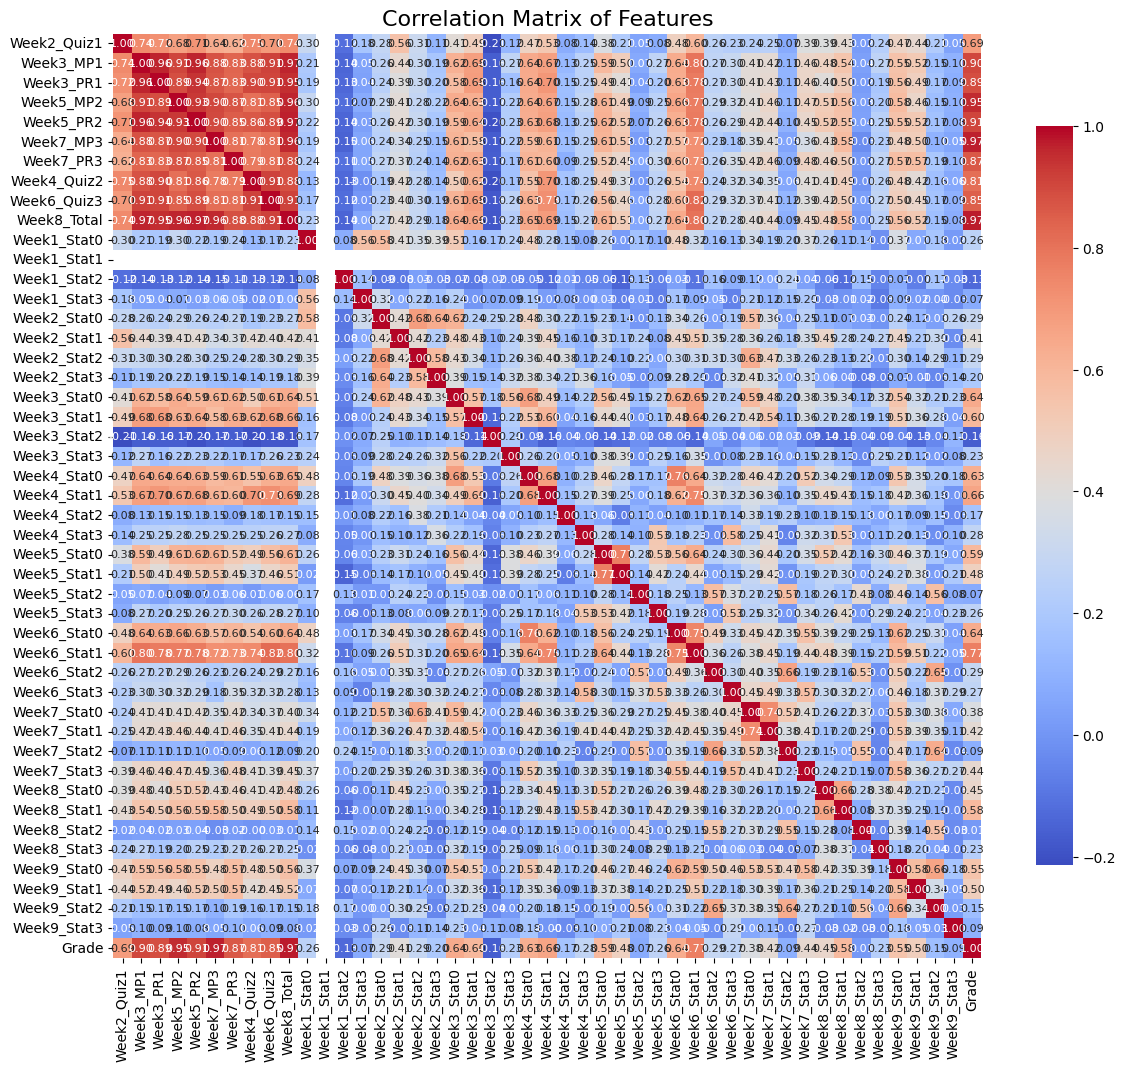

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'corr_matrix' is your correlation matrix
plt.figure(figsize=(14, 12))  # Increase the figure size to make the heatmap larger

# Plot the heatmap with adjusted settings
sns.heatmap(corr_matrix,
            annot=True,            # Add annotations
            fmt=".2f",             # Limit decimal places to 2
            cmap='coolwarm',       # Color scheme
            annot_kws={"size": 8},  # Set font size for annotations
            cbar_kws={"shrink": .8} # Shrink the color bar to fit the figure
            )

# Rotate x-axis and y-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Set title
plt.title('Correlation Matrix of Features', fontsize=16)

# Display the heatmap
plt.show()

Since the matrix is too populated I printed out the correlation values for each feature in ascending order

In [26]:
grade_correlation = corr_matrix['Grade'].sort_values(ascending=True)
print("Correlation of features with the final grade:")
print(grade_correlation)

Correlation of features with the final grade:
Week3_Stat2   -0.162950
Week1_Stat2   -0.129440
Week8_Stat2    0.009186
Week1_Stat3    0.072546
Week5_Stat2    0.073326
Week7_Stat2    0.087466
Week9_Stat3    0.094227
Week9_Stat2    0.147822
Week4_Stat2    0.171987
Week2_Stat3    0.202950
Week3_Stat3    0.227106
Week8_Stat3    0.234907
Week1_Stat0    0.256311
Week5_Stat3    0.264079
Week6_Stat3    0.270239
Week4_Stat3    0.278034
Week6_Stat2    0.288761
Week2_Stat2    0.292262
Week2_Stat0    0.293296
Week7_Stat0    0.377195
Week2_Stat1    0.406120
Week7_Stat1    0.424807
Week7_Stat3    0.439733
Week8_Stat0    0.450807
Week5_Stat1    0.484030
Week9_Stat1    0.496753
Week9_Stat0    0.545532
Week8_Stat1    0.584425
Week5_Stat0    0.590146
Week3_Stat1    0.596824
Week4_Stat0    0.625359
Week6_Stat0    0.635807
Week3_Stat0    0.643789
Week4_Stat1    0.662946
Week2_Quiz1    0.689783
Week6_Stat1    0.771988
Week4_Quiz2    0.810920
Week6_Quiz3    0.849920
Week7_PR3      0.865616
Week3_PR1      0.8

After inspecting the correlation values I set the threshold to 0.6 to filter the most relevant features and ommit the irrelevant ones.

In [27]:
threshold = 0.6
# Selecting features with correlation >= threshold
selected_features = grade_correlation[abs(grade_correlation) >= threshold].index.tolist()

selected_features.remove('Grade')

print("Selected features based on correlation threshold of 0.6:")
print(selected_features)

df_selected = df_clean[selected_features + ['Grade']]
print("\nDataset with selected features:")
print(df_selected.head())

Selected features based on correlation threshold of 0.6:
['Week4_Stat0', 'Week6_Stat0', 'Week3_Stat0', 'Week4_Stat1', 'Week2_Quiz1', 'Week6_Stat1', 'Week4_Quiz2', 'Week6_Quiz3', 'Week7_PR3', 'Week3_PR1', 'Week3_MP1', 'Week5_PR2', 'Week5_MP2', 'Week7_MP3', 'Week8_Total']

Dataset with selected features:
   Week4_Stat0  Week6_Stat0  Week3_Stat0  Week4_Stat1  Week2_Quiz1  \
0           14           28           30           39         5.00   
1          130           57          100           16         3.33   
2           50           14           25           19         1.67   
3          240           99           79           27         2.50   
4            6           22           27           15         0.00   

   Week6_Stat1  Week4_Quiz2  Week6_Quiz3  Week7_PR3  Week3_PR1  Week3_MP1  \
0           30         5.00          5.0        5.0        5.0       15.0   
1           22         4.00          5.0        5.0        5.0       15.0   
2           20         5.00          5.0    

# Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split
X = df_selected.drop(columns=['Grade'])
y = df_selected['Grade']  # Target variable

#Using 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Training target: {y_train.shape}, Test target: {y_test.shape}")

Training set: (85, 15), Test set: (22, 15)
Training target: (85,), Test target: (22,)


# Training with the Linear Regression model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr:.2f}")
print(f"Linear Regression - R-squared: {r2_lr:.2f}")

Linear Regression - Mean Squared Error: 0.74
Linear Regression - R-squared: 0.82


# Training with the Random Forest Regressor model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - R-squared: {r2_rf:.2f}")

Random Forest - Mean Squared Error: 0.04
Random Forest - R-squared: 0.99


# Visualization

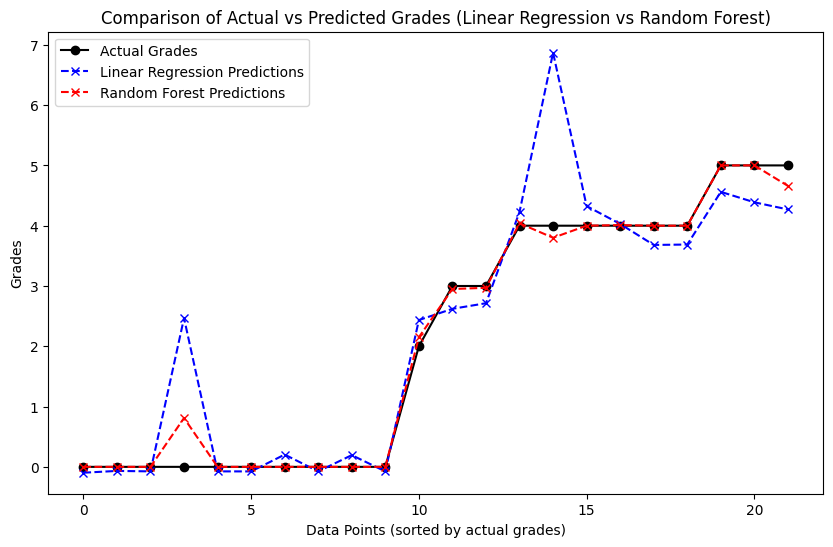

In [11]:
import numpy as np

sorted_indices = np.argsort(y_test)

plt.figure(figsize=(10, 6))

plt.plot(np.arange(len(y_test)), y_test.iloc[sorted_indices], label='Actual Grades', color='black', linestyle='-', marker='o')

plt.plot(np.arange(len(y_test)), y_pred_lr[sorted_indices], label='Linear Regression Predictions', color='blue', linestyle='--', marker='x')

plt.plot(np.arange(len(y_test)), y_pred_rf[sorted_indices], label='Random Forest Predictions', color='red', linestyle='--', marker='x')

plt.xlabel('Data Points (sorted by actual grades)')
plt.ylabel('Grades')
plt.title('Comparison of Actual vs Predicted Grades (Linear Regression vs Random Forest)')
plt.legend()

plt.show()

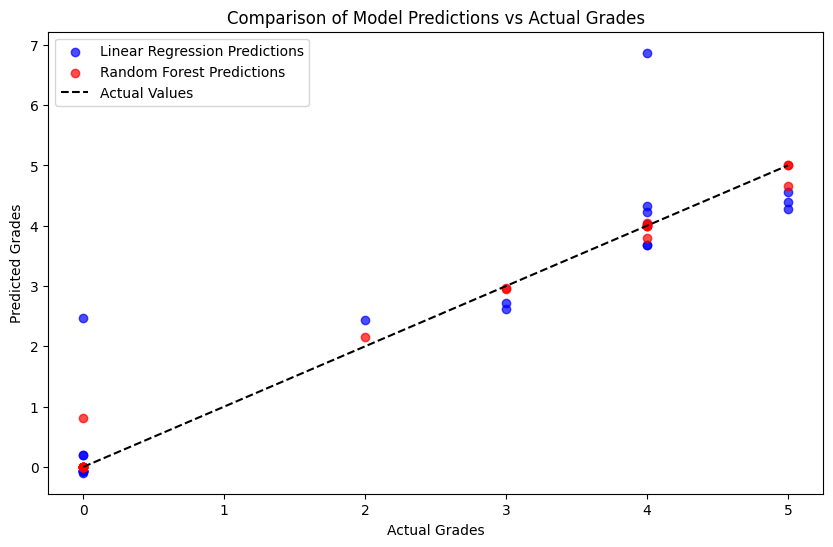

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for Linear Regression
plt.scatter(y_test, y_pred_lr, label='Linear Regression Predictions', alpha=0.7, color='blue')

# Scatter plot for Random Forest
plt.scatter(y_test, y_pred_rf, label='Random Forest Predictions', alpha=0.7, color='red')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Actual Values')

plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Comparison of Model Predictions vs Actual Grades')
plt.legend()

plt.show()

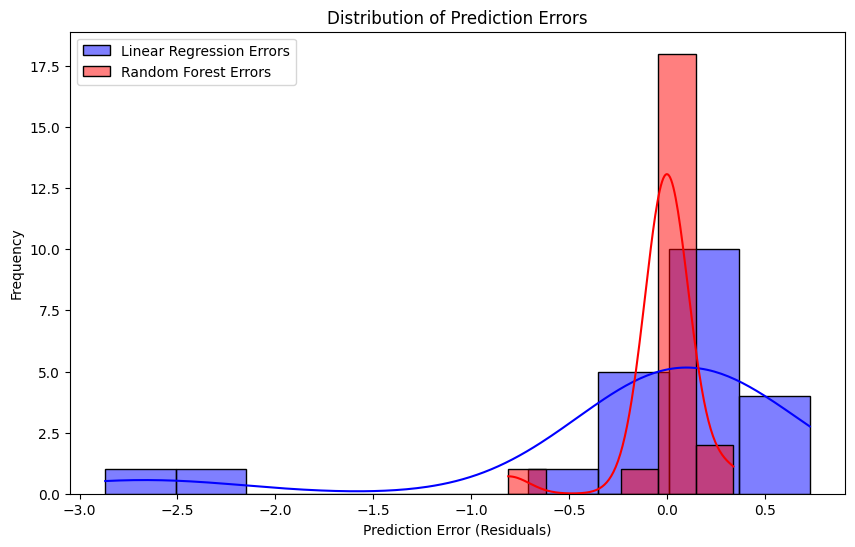

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(errors_lr, label='Linear Regression Errors', color='blue', kde=True)
sns.histplot(errors_rf, label='Random Forest Errors', color='red', kde=True)

plt.xlabel('Prediction Error (Residuals)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.legend()
plt.show()

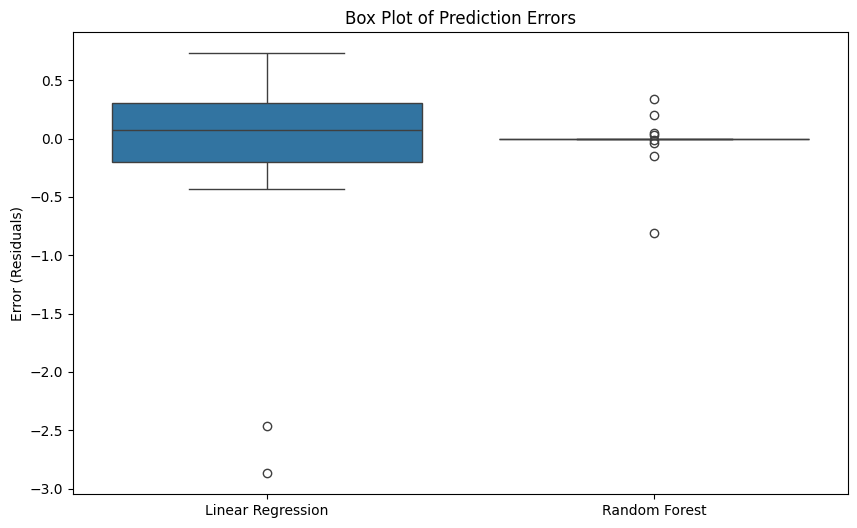

In [14]:
errors_df = pd.DataFrame({
    'Linear Regression': errors_lr,
    'Random Forest': errors_rf
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=errors_df)

plt.title('Box Plot of Prediction Errors')
plt.ylabel('Error (Residuals)')
plt.show()

# Metrics

In [16]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Linear Regression - RMSE: {rmse_lr:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")

Linear Regression - RMSE: 0.86
Random Forest - RMSE: 0.20


In [19]:
from sklearn.metrics import max_error

max_err_lr = max_error(y_test, y_pred_lr)
max_err_rf = max_error(y_test, y_pred_rf)

print(f"Linear Regression - Max Error: {max_err_lr:.2f}")
print(f"Random Forest - Max Error: {max_err_rf:.2f}")

Linear Regression - Max Error: 2.87
Random Forest - Max Error: 0.81


Scatter plot of Max Error

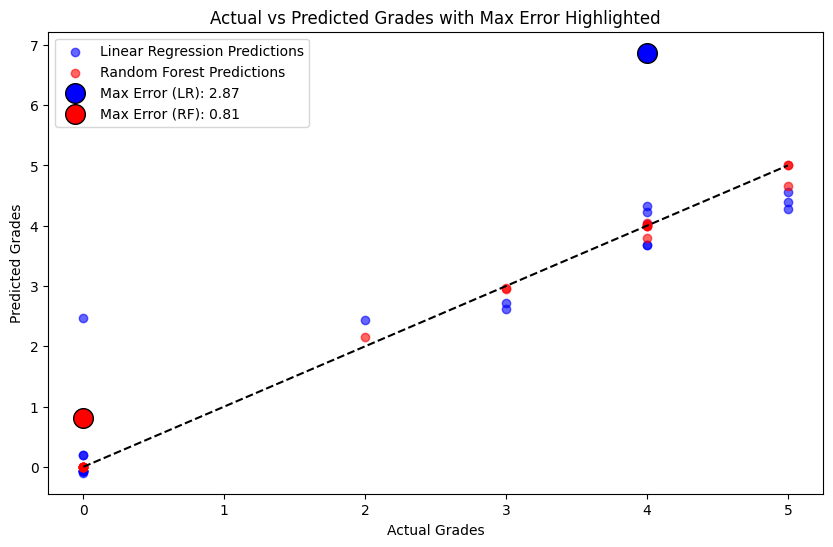

In [20]:
max_error_idx_lr = np.argmax(np.abs(y_test - y_pred_lr))
max_error_idx_rf = np.argmax(np.abs(y_test - y_pred_rf))

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lr, label='Linear Regression Predictions', alpha=0.6, color='blue')
plt.scatter(y_test, y_pred_rf, label='Random Forest Predictions', alpha=0.6, color='red')

plt.scatter([y_test.iloc[max_error_idx_lr]], [y_pred_lr[max_error_idx_lr]],
            label=f'Max Error (LR): {max_err_lr:.2f}', color='blue', edgecolor='black', s=200)
plt.scatter([y_test.iloc[max_error_idx_rf]], [y_pred_rf[max_error_idx_rf]],
            label=f'Max Error (RF): {max_err_rf:.2f}', color='red', edgecolor='black', s=200)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')

plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades with Max Error Highlighted')
plt.legend()

plt.show()

Box plot of Max Error

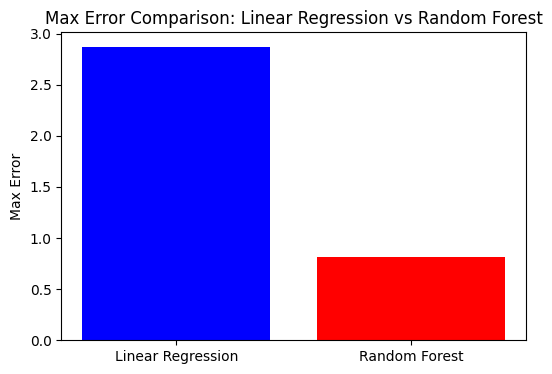

In [21]:
plt.figure(figsize=(6, 4))

plt.bar(['Linear Regression', 'Random Forest'], [max_err_lr, max_err_rf], color=['blue', 'red'])

plt.ylabel('Max Error')
plt.title('Max Error Comparison: Linear Regression vs Random Forest')

plt.show()

# Feature Importance

Top 3 Important Features (Random Forest):
       Feature  Importance
0  Week8_Total    0.390090
1    Week7_MP3    0.252112
2    Week5_MP2    0.170248


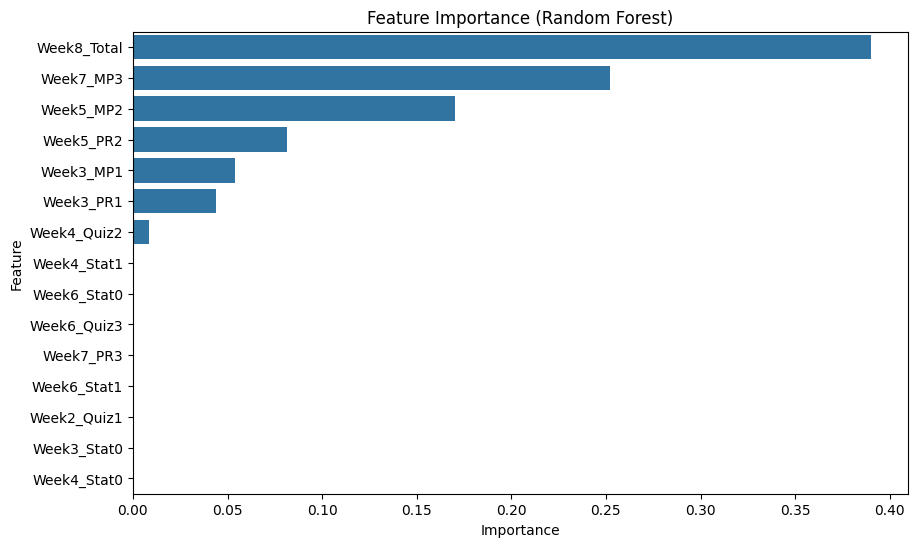

In [32]:
feature_importance = rf_model.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print("Top 3 Important Features (Random Forest):")
print(feature_df.head(3))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

Top 3 Important Features (Linear Regression):
     Feature  Coefficient
5  Week3_PR1    -0.501649
4  Week3_MP1     0.138298
2  Week5_MP2     0.099105


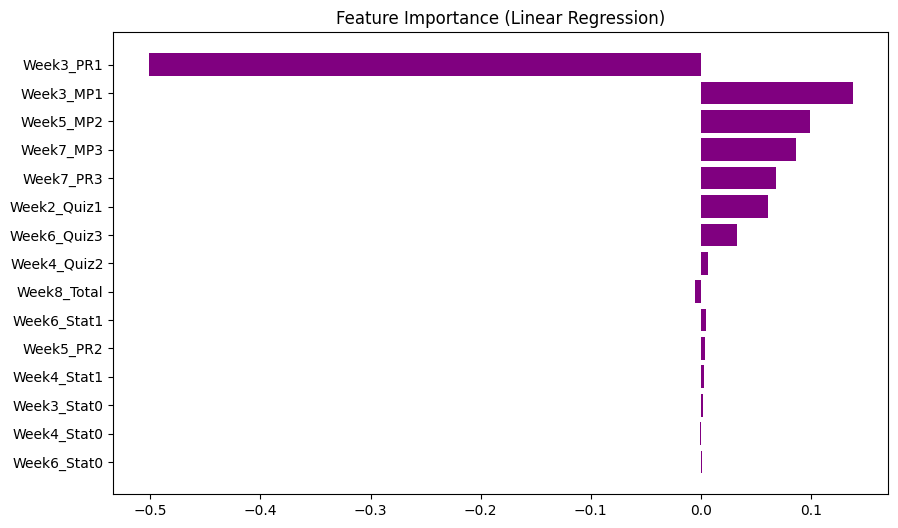

In [28]:
# Get the coefficients from the Linear Regression model
coefficients = lr_model.coef_

# Create a DataFrame to pair feature names with their coefficients
lr_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficient in descending order
lr_features_sorted = lr_features.reindex(lr_features['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top 3 most important features
print("Top 3 Important Features (Linear Regression):")
print(lr_features_sorted.head(3))

# Plot coefficients for visualization
plt.figure(figsize=(10,6))
plt.barh(lr_features_sorted['Feature'], lr_features_sorted['Coefficient'], color='purple')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()